# Create Breed Detector model

In [1]:
import os

import coremltools as ct

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
from keras.callbacks import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

from skimage.io import imread
from PIL import Image

### Load pre-trained model

We used a DenseNet121 neural networking for this model.

The weights for it was calculated over a huge [dataset](https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset) which contains more than 20k images of 120 dog breeds. The process of training can be accessed [here](https://www.kaggle.com/code/hengzheng/dog-breeds-classifier).

In [2]:
inp = Input((224,224,3))
backbone = tf.keras.applications.DenseNet121(weights=None, input_tensor=inp, classes=120, include_top=False)

x = backbone.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
outp = Dense(120, activation="softmax")(x)

model = Model(inp, outp)
model.load_weights('dog_breed_classifier_model.h5')

### Define labels for classification model

In [3]:
labels = ['n02091635-otterhound', 'n02102318-cocker_spaniel', 'n02101388-Brittany_spaniel', 'n02088094-Afghan_hound', 'n02085936-Maltese_dog', 'n02104365-schipperke', 'n02100877-Irish_setter', 'n02086079-Pekinese', 'n02099601-golden_retriever', 'n02100583-vizsla', 'n02102177-Welsh_springer_spaniel', 'n02093256-Staffordshire_bullterrier', 'n02106166-Border_collie', 'n02093991-Irish_terrier', 'n02109961-Eskimo_dog', 'n02110958-pug', 'n02105412-kelpie', 'n02094433-Yorkshire_terrier', 'n02097474-Tibetan_terrier', 'n02089867-Walker_hound', 'n02110627-affenpinscher', 'n02113186-Cardigan', 'n02102040-English_springer', 'n02089973-English_foxhound', 'n02098286-West_Highland_white_terrier', 'n02095570-Lakeland_terrier', 'n02087394-Rhodesian_ridgeback', 'n02101006-Gordon_setter', 'n02098413-Lhasa', 'n02099429-curly-coated_retriever', 'n02088364-beagle', 'n02108551-Tibetan_mastiff', 'n02102480-Sussex_spaniel', 'n02109525-Saint_Bernard', 'n02087046-toy_terrier', 'n02113799-standard_poodle', 'n02107683-Bernese_mountain_dog', 'n02112018-Pomeranian', 'n02091244-Ibizan_hound', 'n02090379-redbone', 'n02113624-toy_poodle', 'n02088238-basset', 'n02092002-Scottish_deerhound', 'n02107312-miniature_pinscher', 'n02110806-basenji', 'n02093754-Border_terrier', 'n02093647-Bedlington_terrier', 'n02093859-Kerry_blue_terrier', 'n02092339-Weimaraner', 'n02100735-English_setter', 'n02088632-bluetick', 'n02096585-Boston_bull', 'n02091032-Italian_greyhound', 'n02096437-Dandie_Dinmont', 'n02096051-Airedale', 'n02102973-Irish_water_spaniel', 'n02094114-Norfolk_terrier', 'n02095314-wire-haired_fox_terrier', 'n02108915-French_bulldog', 'n02098105-soft-coated_wheaten_terrier', 'n02105505-komondor', 'n02116738-African_hunting_dog', 'n02110185-Siberian_husky', 'n02111277-Newfoundland', 'n02106382-Bouvier_des_Flandres', 'n02091831-Saluki', 'n02105855-Shetland_sheepdog', 'n02106030-collie', 'n02106550-Rottweiler', 'n02097658-silky_terrier', 'n02091467-Norwegian_elkhound', 'n02085620-Chihuahua', 'n02111129-Leonberg', 'n02094258-Norwich_terrier', 'n02096177-cairn', 'n02108089-boxer', 'n02090622-borzoi', 'n02115913-dhole', 'n02111889-Samoyed', 'n02106662-German_shepherd', 'n02099712-Labrador_retriever', 'n02086646-Blenheim_spaniel', 'n02105056-groenendael', 'n02107142-Doberman', 'n02109047-Great_Dane', 'n02099267-flat-coated_retriever', 'n02107908-Appenzeller', 'n02086240-Shih-Tzu', 'n02085782-Japanese_spaniel', 'n02107574-Greater_Swiss_Mountain_dog', 'n02089078-black-and-tan_coonhound', 'n02115641-dingo', 'n02111500-Great_Pyrenees', 'n02091134-whippet', 'n02112350-keeshond', 'n02105162-malinois', 'n02093428-American_Staffordshire_terrier', 'n02113978-Mexican_hairless', 'n02097130-giant_schnauzer', 'n02112706-Brabancon_griffon', 'n02104029-kuvasz', 'n02113712-miniature_poodle', 'n02090721-Irish_wolfhound', 'n02105251-briard', 'n02101556-clumber', 'n02097209-standard_schnauzer', 'n02108422-bull_mastiff', 'n02110063-malamute', 'n02095889-Sealyham_terrier', 'n02108000-EntleBucher', 'n02112137-chow', 'n02086910-papillon', 'n02113023-Pembroke', 'n02100236-German_short-haired_pointer', 'n02105641-Old_English_sheepdog', 'n02099849-Chesapeake_Bay_retriever', 'n02097298-Scotch_terrier', 'n02096294-Australian_terrier', 'n02097047-miniature_schnauzer', 'n02088466-bloodhound']

labels = list(map(lambda x: x.split("-", 1)[1].replace("_", " ").capitalize(), labels))

### Testing the model

In [4]:
def download_and_predict(url, filename):
    # download and save
    os.system("curl -s {} -o {}".format(url, filename))
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((224, 224))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = imread(filename)
    img = tf.keras.applications.densenet.preprocess_input(img)
    probs = model.predict(np.expand_dims(img, axis=0))
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", labels[idx])

97.62% 	 Basenji
2.20% 	 Ibizan hound
0.10% 	 Dingo
0.04% 	 Cardigan
0.01% 	 Kelpie


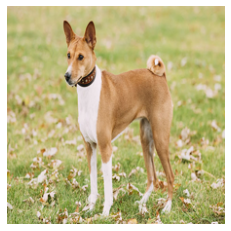

In [6]:
download_and_predict("https://www.clubeparacachorros.com.br/wp-content/uploads/2014/09/basenji-pe.jpg", "testing/test1.jpg")

74.11% 	 Chihuahua
23.86% 	 Pembroke
0.86% 	 Cardigan
0.69% 	 Toy terrier
0.11% 	 Norwich terrier


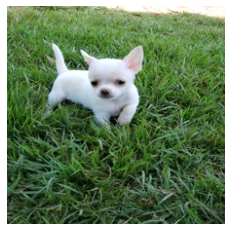

In [7]:
download_and_predict("https://petshopdamadre.com.br/wp-content/uploads/2018/12/WhatsApp-Image-2020-05-15-at-17.33.55.jpeg", "testing/test2.jpeg")

67.99% 	 Golden retriever
12.72% 	 Chow
4.37% 	 Cocker spaniel
3.91% 	 Leonberg
2.13% 	 Pekinese


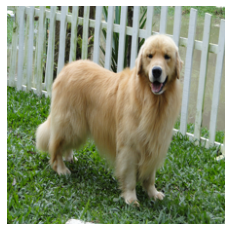

In [8]:
download_and_predict("https://www.tajjmahall.com.br/wp-content/uploads/2019/06/a-ELVIS-8.jpg", "testing/test3.jpg")

55.22% 	 German shepherd
36.48% 	 Malinois
2.92% 	 Kelpie
2.08% 	 Norwegian elkhound
0.83% 	 Leonberg


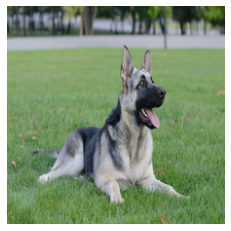

In [9]:
download_and_predict("https://www.hepper.com/wp-content/uploads/2021/12/silver-sable-german-shepherd_J.-Romanova_Shutterstock.jpg", "testing/test4.jpg")

62.10% 	 Australian terrier
23.20% 	 Silky terrier
10.88% 	 Yorkshire terrier
1.31% 	 Cairn
1.17% 	 Norwich terrier


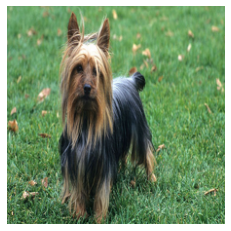

In [10]:
download_and_predict("https://vetstreet-brightspot.s3.amazonaws.com/eb/0af970a80611e0a0d50050568d634f/file/Silky-Terrier-1-645mk062811.jpg", "testing/test5.jpg")
# wrong

29.50% 	 Soft-coated wheaten terrier
12.35% 	 Dandie dinmont
11.57% 	 Tibetan terrier
6.41% 	 Shih-tzu
5.76% 	 Lhasa


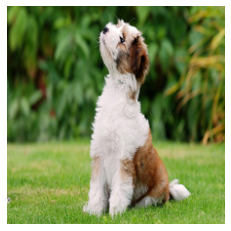

In [11]:
download_and_predict("https://vetstreet.brightspotcdn.com/dims4/default/b4f747c/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F66%2F2315d0c82711e09b940050568d6ceb%2Ffile%2FTibetan-Terrier-1-AP-645km081611.jpg", "testing/test6.jpg")
# wrong

### Convert the model to CoreML

In [13]:
imgInp = ct.ImageType(shape=(1, 224, 224, 3), bias=[-1,-1,-1], scale=1/127.5)
classfConfig = ct.ClassifierConfig(labels)
mlmodel = ct.convert(model, inputs=[imgInp], classifier_config=classfConfig)

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 1619/1619 [00:00<00:00, 2295.29 ops/s]


In [14]:
spec = mlmodel.get_spec()
ct.utils.rename_feature(spec, "input_1", "dogImage")
ct.utils.rename_feature(spec, "Identity", "probabilities")
ct.utils.rename_feature(spec, "classLabel", "breed")
mlmodel = ct.models.MLModel(spec)

In [15]:
img = Image.open("testing/test3.jpg").resize((224, 224))
probs = mlmodel.predict({"dogImage" : img})['probabilities']
probs = sorted(probs.items(), key=lambda kv: kv[1])
probs = {k: v for k, v in list(probs)[::-1][:5]}
probs

{'Golden retriever': 0.8471339344978333,
 'Chow': 0.0416874885559082,
 'Cocker spaniel': 0.02879159152507782,
 'Leonberg': 0.019800394773483276,
 'Great pyrenees': 0.013192805461585522}

In [16]:
mlmodel.save("../what-a-dog/Model/ML/BreedClassifier.mlmodel")